In [146]:
import requests,json,os
from urllib.parse import quote 
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster

In [113]:
with open('data/sub_arr_info_key.txt') as f:
    info_key = f.read()

In [114]:
df_st = pd.read_csv('data/st_addr_20230518.csv')

In [115]:
target = input('역명 입력')
target = target[:-1] if target[-1] == '역' else target

In [116]:
base_url = "http://swopenAPI.seoul.go.kr/api/subway/"
params1 = f"{info_key}/json/realtimeStationArrival/0/16/"
params2 = quote(target)
url = f"{base_url}{params1}{params2}"
response = requests.get(url)
res = json.loads(response.text)

In [117]:
df = pd.DataFrame(res['realtimeArrivalList'])
df = df[['updnLine','trainLineNm','statnNm','bstatnNm','arvlMsg2','arvlMsg3','subwayId','arvlCd']]

In [118]:
df.subwayId.astype(int)
df

,updnLine,trainLineNm,statnNm,bstatnNm,arvlMsg2,arvlMsg3,subwayId,arvlCd
0,상행,검암행 - 공덕방면,서울,검암,서울 출발,서울,1065,2
1,상행,광운대행 - 시청방면,서울,광운대,서울 도착,서울,1001,1
2,상행,당고개행 - 회현방면,서울,당고개,전역 도착,숙대입구,1004,5
3,상행,문산행 - 신촌(경의중앙선)방면,서울,문산,전역 도착,홍대입구,1063,5
4,상행,청량리행 - 시청방면,서울,청량리,[20]번째 전역 (성균관대),성균관대,1001,99
5,상행,동두천행 - 시청방면,서울,동두천,5분 후 (용산),용산,1001,99
6,상행,당고개행 - 회현방면,서울,당고개,10분 53초 후 (동작),동작,1004,99
7,상행,문산행 - 신촌(경의중앙선)방면,서울,문산,[8]번째 전역 (한남),한남,1063,99
8,상행,청량리행 - 시청방면,서울,청량리,[24]번째 전역 (병점),병점,1001,99
9,하행,사당행 - 숙대입구방면,서울,사당,서울 도착,서울,1004,1


In [119]:
df1 = df[df.updnLine == '상행'].head(4).copy()
df2 = df[df.updnLine == '하행'].head(4).copy().reset_index(drop=True)

In [120]:
def kakao_location(place):
    with open('../04.지도시각화/data/kakaoapikey.txt') as f_:
        kakao_key = f_.read()
    base_url = "https://dapi.kakao.com/v2/local/search/address.json"
    url = f'{base_url}?query={quote(place)}'
    header = {'Authorization':f'KakaoAK {kakao_key}'}
    result = requests.get(url, headers=header).json()
    lat_ = float(result['documents'][0]['y'])
    lng_ = float(result['documents'][0]['x'])
    return lat_,lng_

In [121]:
def rtn_addr(target):
    str_addr = df_st[df_st.역명 == target].도로명주소.values[-1]
    return str_addr.strip()

In [122]:
temp1 =[]
for i in df1.index:
    bst = df1.arvlMsg3[i].strip()
    temp1.append(kakao_location(rtn_addr(bst)))

df_test = pd.DataFrame(temp1,columns=('lat','lng'))
df1 = pd.concat([df1, df_test], axis=1)
df1

,updnLine,trainLineNm,statnNm,bstatnNm,arvlMsg2,arvlMsg3,subwayId,arvlCd,lat,lng
0,상행,검암행 - 공덕방면,서울,검암,서울 출발,서울,1065,2,37.553200,126.972805
1,상행,광운대행 - 시청방면,서울,광운대,서울 도착,서울,1001,1,37.553200,126.972805
2,상행,당고개행 - 회현방면,서울,당고개,전역 도착,숙대입구,1004,5,37.545194,126.971872
3,상행,문산행 - 신촌(경의중앙선)방면,서울,문산,전역 도착,홍대입구,1063,5,37.557445,126.926779


In [123]:
temp1 =[]
for i in df2.index:
    bst = df2.arvlMsg3[i].strip()
    temp1.append(kakao_location(rtn_addr(bst)))
    
df_test = pd.DataFrame(temp1,columns=('lat','lng'))
df2 = pd.concat([df2, df_test], axis=1)
df2

,updnLine,trainLineNm,statnNm,bstatnNm,arvlMsg2,arvlMsg3,subwayId,arvlCd,lat,lng
0,하행,사당행 - 숙대입구방면,서울,사당,서울 도착,서울,1004,1,37.553200,126.972805
1,하행,서울행 - 서울방면,서울,서울,전역 도착,공덕,1065,5,37.542844,126.951336
2,하행,신창행 - 남영방면,서울,신창,전역 출발,시청,1001,3,37.563579,126.975389
3,하행,인천행 - 남영방면,서울,인천,[4]번째 전역 (종로5가),종로5가,1001,99,37.570908,127.001917


In [124]:
lat,lng = kakao_location(rtn_addr(target))
print(target,lat,lng)

서울 37.5532000173323 126.972805485095


In [143]:
df1.subwayId = df1.subwayId.astype(int)
df2.subwayId = df2.subwayId.astype(int)


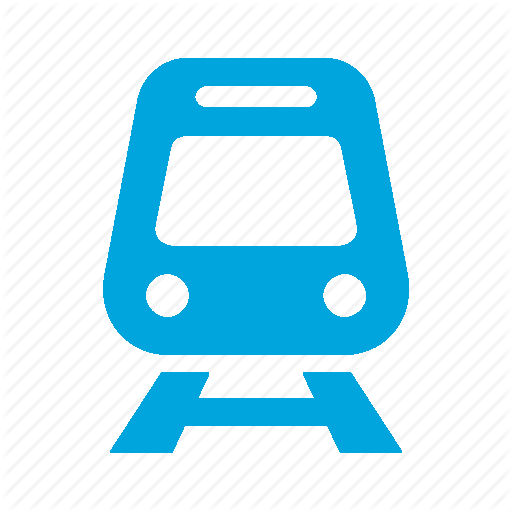
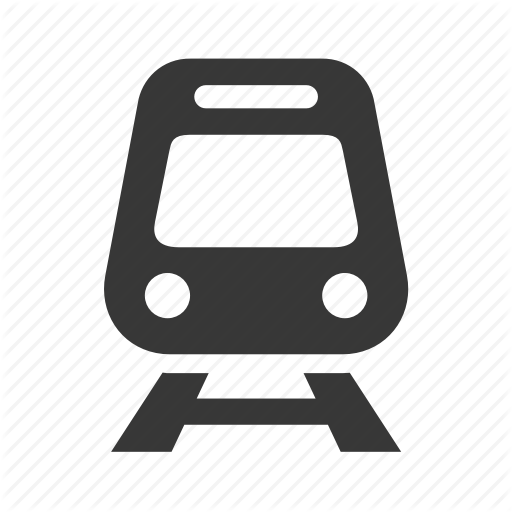
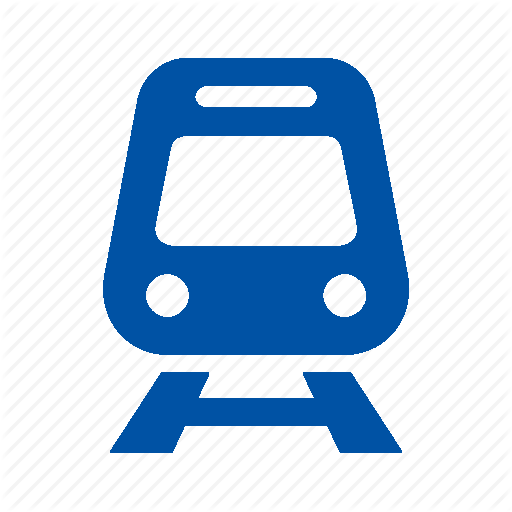
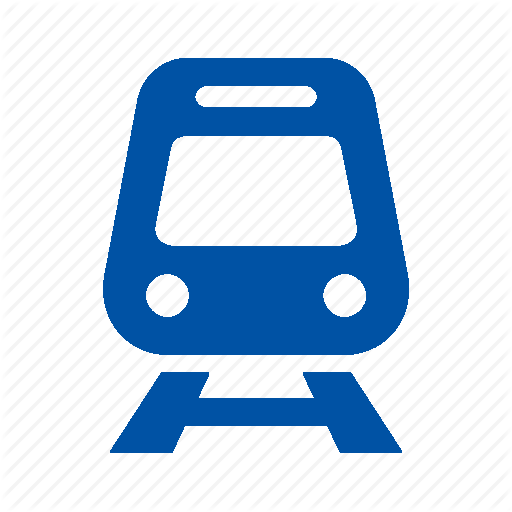
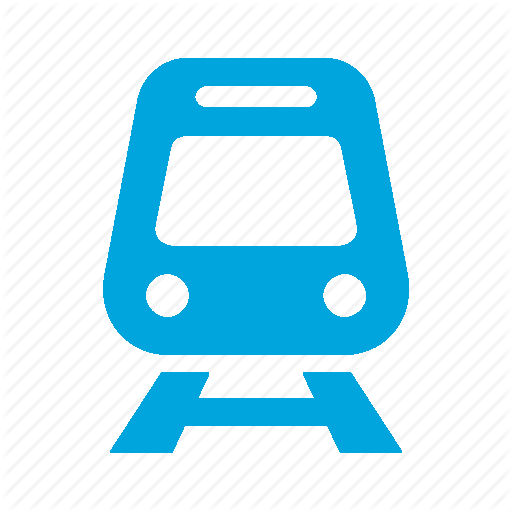
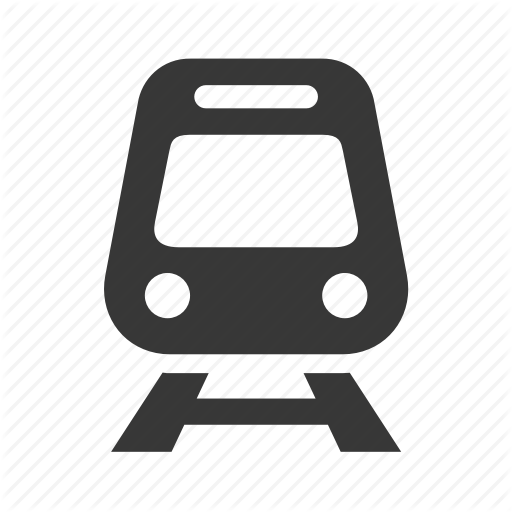
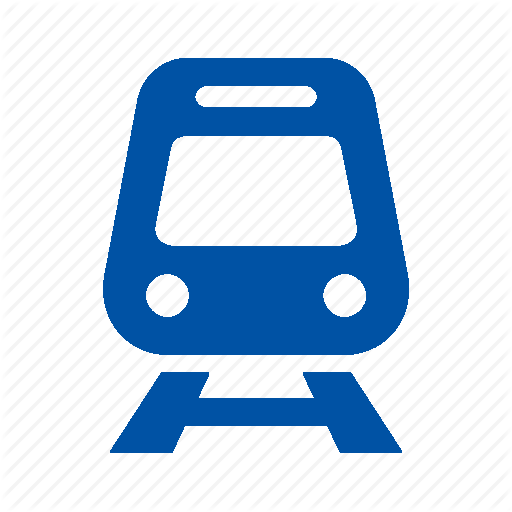
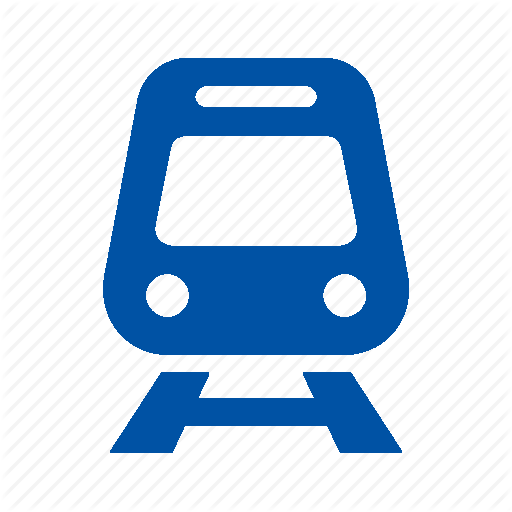

In [145]:
stn_map = folium.Map(location=[lat,lng],zoom_start=13)
marker_cluster = MarkerCluster().add_to(stn_map)

for i in df1.index:
    icon_image = f'data/icons/sb-{df1.subwayId[i]%1000}.png'
    if not os.path.exists(icon_image):
        icon_image = f'data/icons/sb-init.png'
    pushpin = folium.CustomIcon(icon_image=icon_image, icon_size=(40,40))
    folium.Marker(
        location=[df1.lat[i], df1.lng[i]], 
        popup=folium.Popup(df1.arvlMsg2[i],max_width=300),
        tooltip=df1.arvlMsg3[i],
        icon=pushpin
    ).add_to(marker_cluster)

for i in df2.index:
    icon_image = f'data/icons/sb-{df2.subwayId[i]%1000}.png'
    if not os.path.exists(icon_image):
        icon_image = f'data/icons/sb-init.png'
    pushpin = folium.CustomIcon(icon_image=icon_image, icon_size=(40,40),)
    folium.Marker(
        location=[df2.lat[i], df2.lng[i]], 
        popup=folium.Popup(df2.arvlMsg2[i],max_width=300),
        tooltip=df2.arvlMsg3[i],
        icon=pushpin
    ).add_to(marker_cluster)

title_html = '<h3 align="center" style="font-size:20px">지하철 실시간 도착정보</h3>'
stn_map.get_root().html.add_child(folium.Element(title_html))
stn_map


In [ ]:
# 상행 하행 구분 좀더 명확하게 - x
# 노선별로 아이콘 색 다르게 - id 1000으로 나눠서 1 -> 1호선 75 -> 수인분당
# 급행도 아이콘 다르게 - x
# 검색한 역 아이콘 다르게 - 서클로?
# 어? 근데 html에서 보여주려면 .values로 꺼내야 함?
what = df2.iloc[:,:6].values

In [ ]:
what

array([['하행', '사당행 - 숙대입구방면', '서울', '사당', '서울 도착', '서울'],
       ['하행', '천안행 - 남영방면', '서울', '천안', '서울 도착', '서울'],
       ['하행', '서울행 - 서울방면', '서울', '서울', '전역 출발', '공덕'],
       ['하행', '서울행 - 서울방면 (급행)', '서울', '서울 (급행)', '전역 출발', '공덕']],
      dtype=object)

In [ ]:
# from folium.plugins import MarkerCluster

# stn_map = folium.Map(location=[lat,lng],zoom_start=13)
# marker_cluster = MarkerCluster().add_to(stn_map)

# for i in df1.index:
#     pushpin = folium.CustomIcon(f'data/micon.jpg', icon_size=(40,40))
#     popup_text = f"{df1.arvlMsg2[i]}<br>{df1.arvlMsg4[i]}"
#     folium.Marker(
#         location=[df1.lat[i], df1.lng[i]], 
#         popup=folium.Popup(popup_text,max_width=300),
#         tooltip=df1.arvlMsg3[i],
#         icon=pushpin 
#     ).add_to(marker_cluster)
